In [1]:
library('tidyverse') 
library('RColorBrewer')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
netflix = read_csv('https://raw.githubusercontent.com/kelucas/BIOS512/main/netflix_titles.csv', col_types = cols())

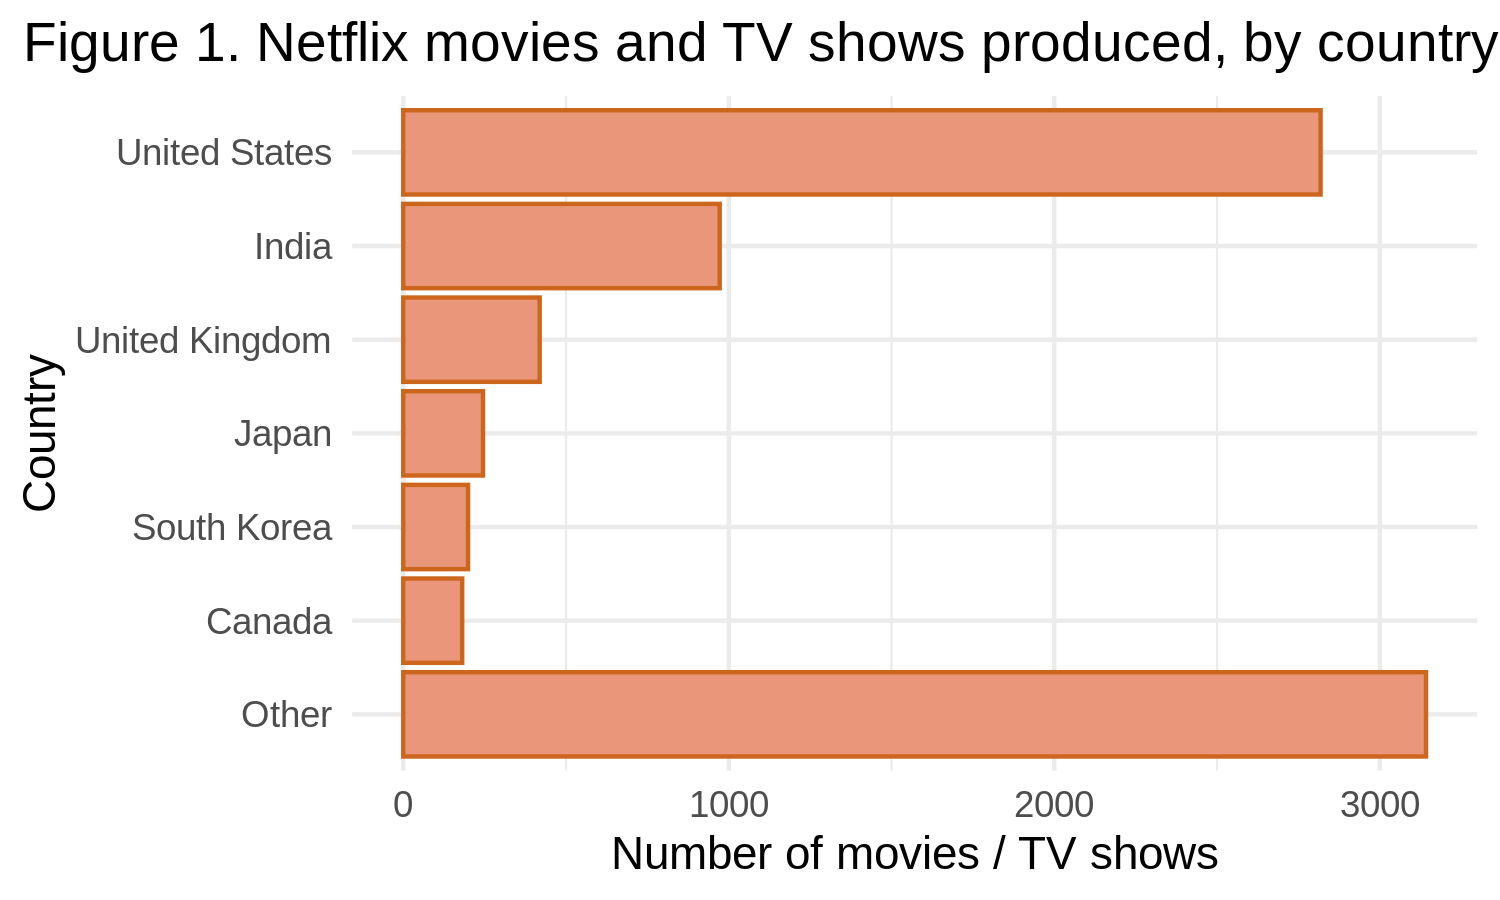

In [3]:
#Netflix content by country
netflix2=netflix |> 
    mutate(country=fct_infreq(country) |> 
           fct_rev() |> 
           fct_lump(n=6) |>  
           fct_relevel('Other')) |> 
    filter(!is.na(country)) 

options(repr.plot.height = 3, repr.plot.width=5) 

p = ggplot(netflix2, aes(y=country)) + geom_bar(fill='darksalmon', color='chocolate3') +
    labs(title='Figure 1. Netflix movies and TV shows produced, by country',
        x='Number of movies / TV shows', y='Country') +
    theme_minimal() + 
    theme(plot.title.position = 'plot')
p


In [4]:
#Amount of Netflix content by country and type
netflix3=netflix |> 
    filter(country %in% c('United States', 'India', 'United Kingdom')) 

In [5]:
netflix3 |> 
    group_by(country, type)|> 
    summarize(N=n())

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


country,type,N
<chr>,<chr>,<int>
India,Movie,893
India,TV Show,79
United Kingdom,Movie,206
United Kingdom,TV Show,213
United States,Movie,2058
United States,TV Show,760


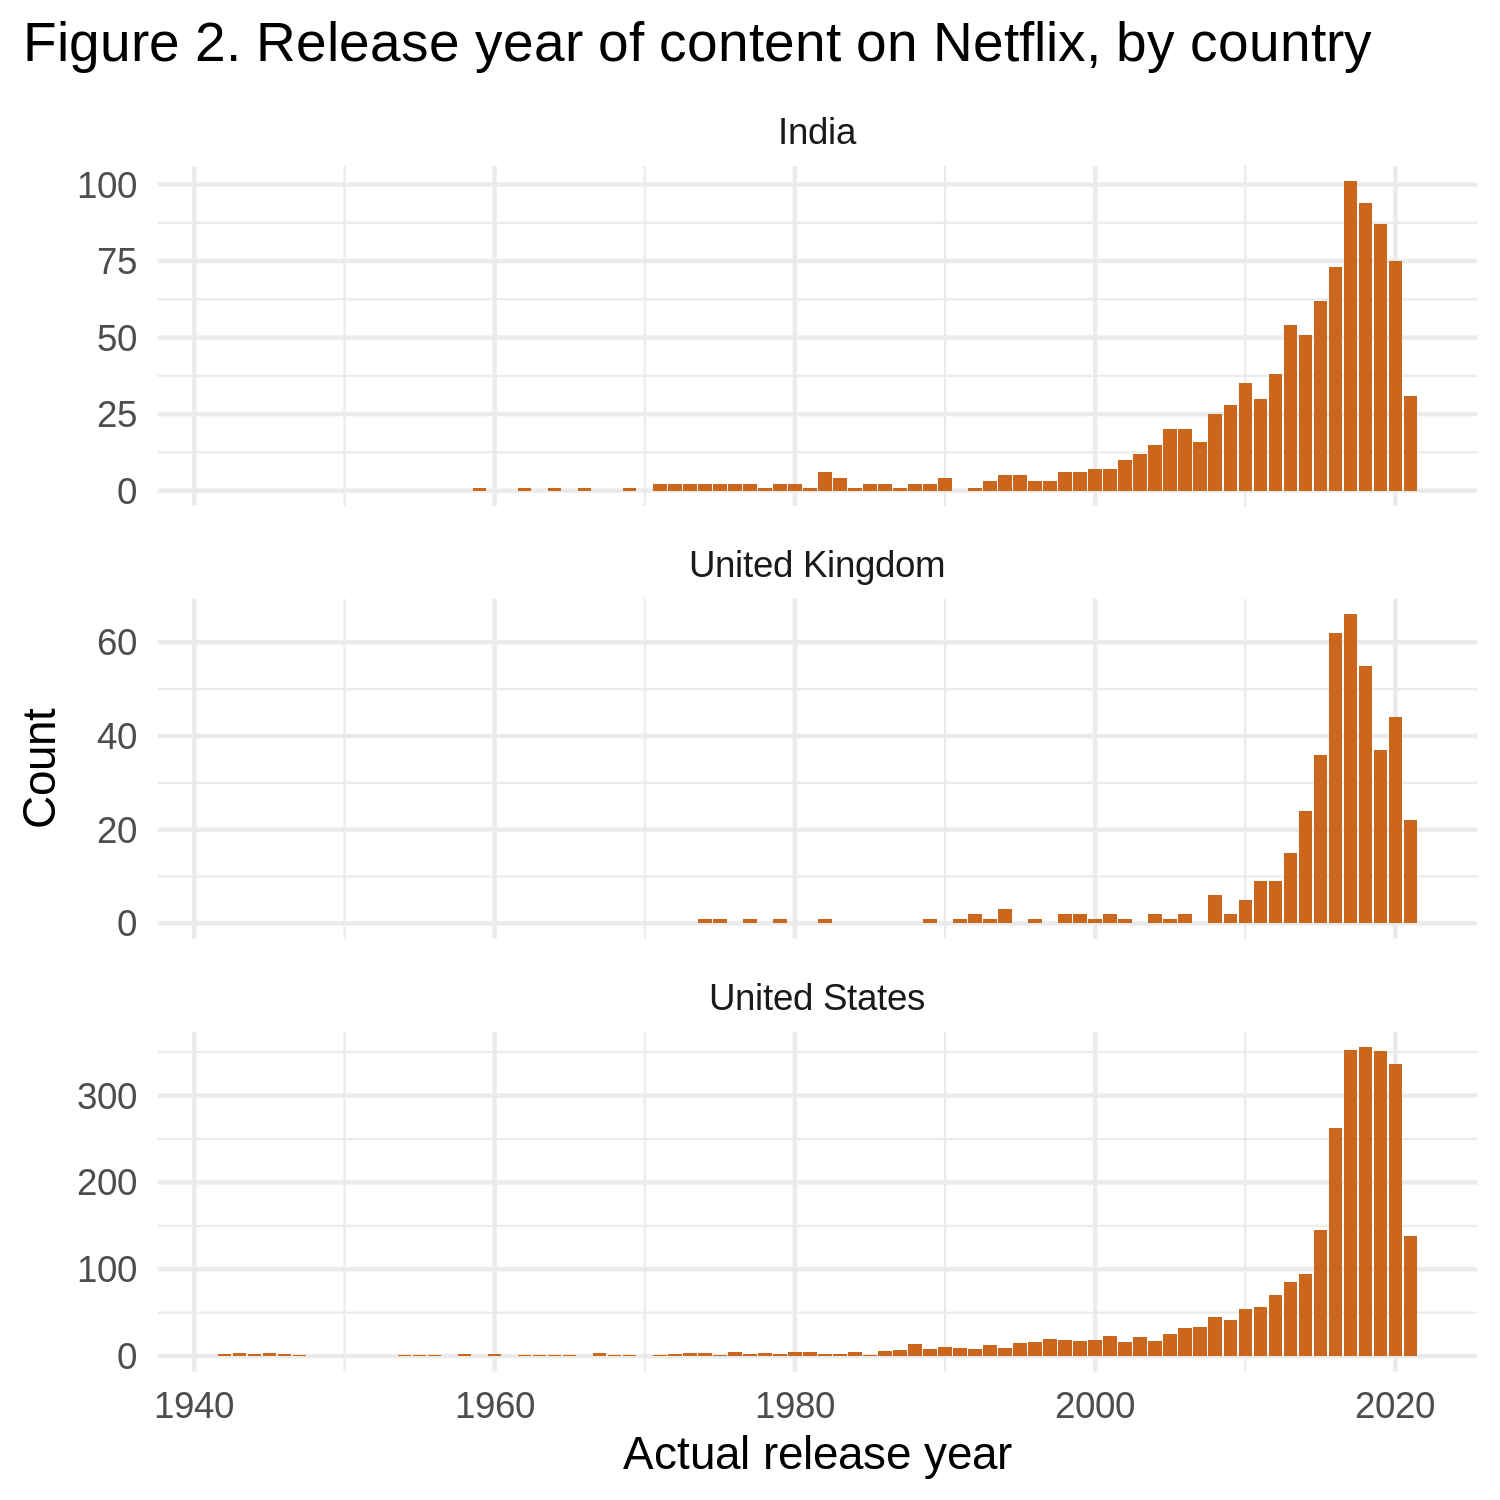

In [6]:
#Release year of content on Netflix, by country (count)
options(repr.plot.height=5, repr.plot.width=5) 

p = ggplot(netflix3, aes(x=release_year)) + geom_bar(fill='chocolate3') + 
    facet_wrap(~country, ncol=1, scales='free_y') + 
    labs(title='Figure 2. Release year of content on Netflix, by country', x='Actual release year', y='Count') + 
    scale_color_brewer(palette='Paired') + scale_fill_brewer(palette='Paired') + 
    theme_minimal() +
    theme(plot.title.position = 'plot')

p

In [7]:
#Top 5 years, actual release date of content on Netflix, US
netflix4=netflix |> 
    filter(country %in% c('United States')) |> 
    group_by(release_year) |> 
    
    summarize(annual_count=sum(release_year)) |> 
    arrange(desc(annual_count)) |> 
    slice_max(annual_count, n=5) |> 
    pull(release_year)

In [8]:
netflix4

[1] 2018 2017 2019 2020 2016

In [9]:
#Top 5 years, actual release date of content on Netflix, India
netflix4a=netflix |> 
    filter(country %in% c('India')) |> 
    group_by(release_year) |> 
    
    summarize(annual_count=sum(release_year)) |> 
    arrange(desc(annual_count)) |> 
    slice_max(annual_count, n=5) |> 
    pull(release_year)

In [10]:
netflix4a

[1] 2017 2018 2019 2020 2016

In [11]:
#Top 5 years, actual release date of content on Netflix, UK
netflix4b=netflix |> 
    filter(country %in% c('United Kingdom')) |> 
    group_by(release_year) |> 
    
    summarize(annual_count=sum(release_year)) |> 
    arrange(desc(annual_count)) |> 
    slice_max(annual_count, n=5) |> 
    pull(release_year)

In [12]:
netflix4b

[1] 2017 2016 2018 2020 2019

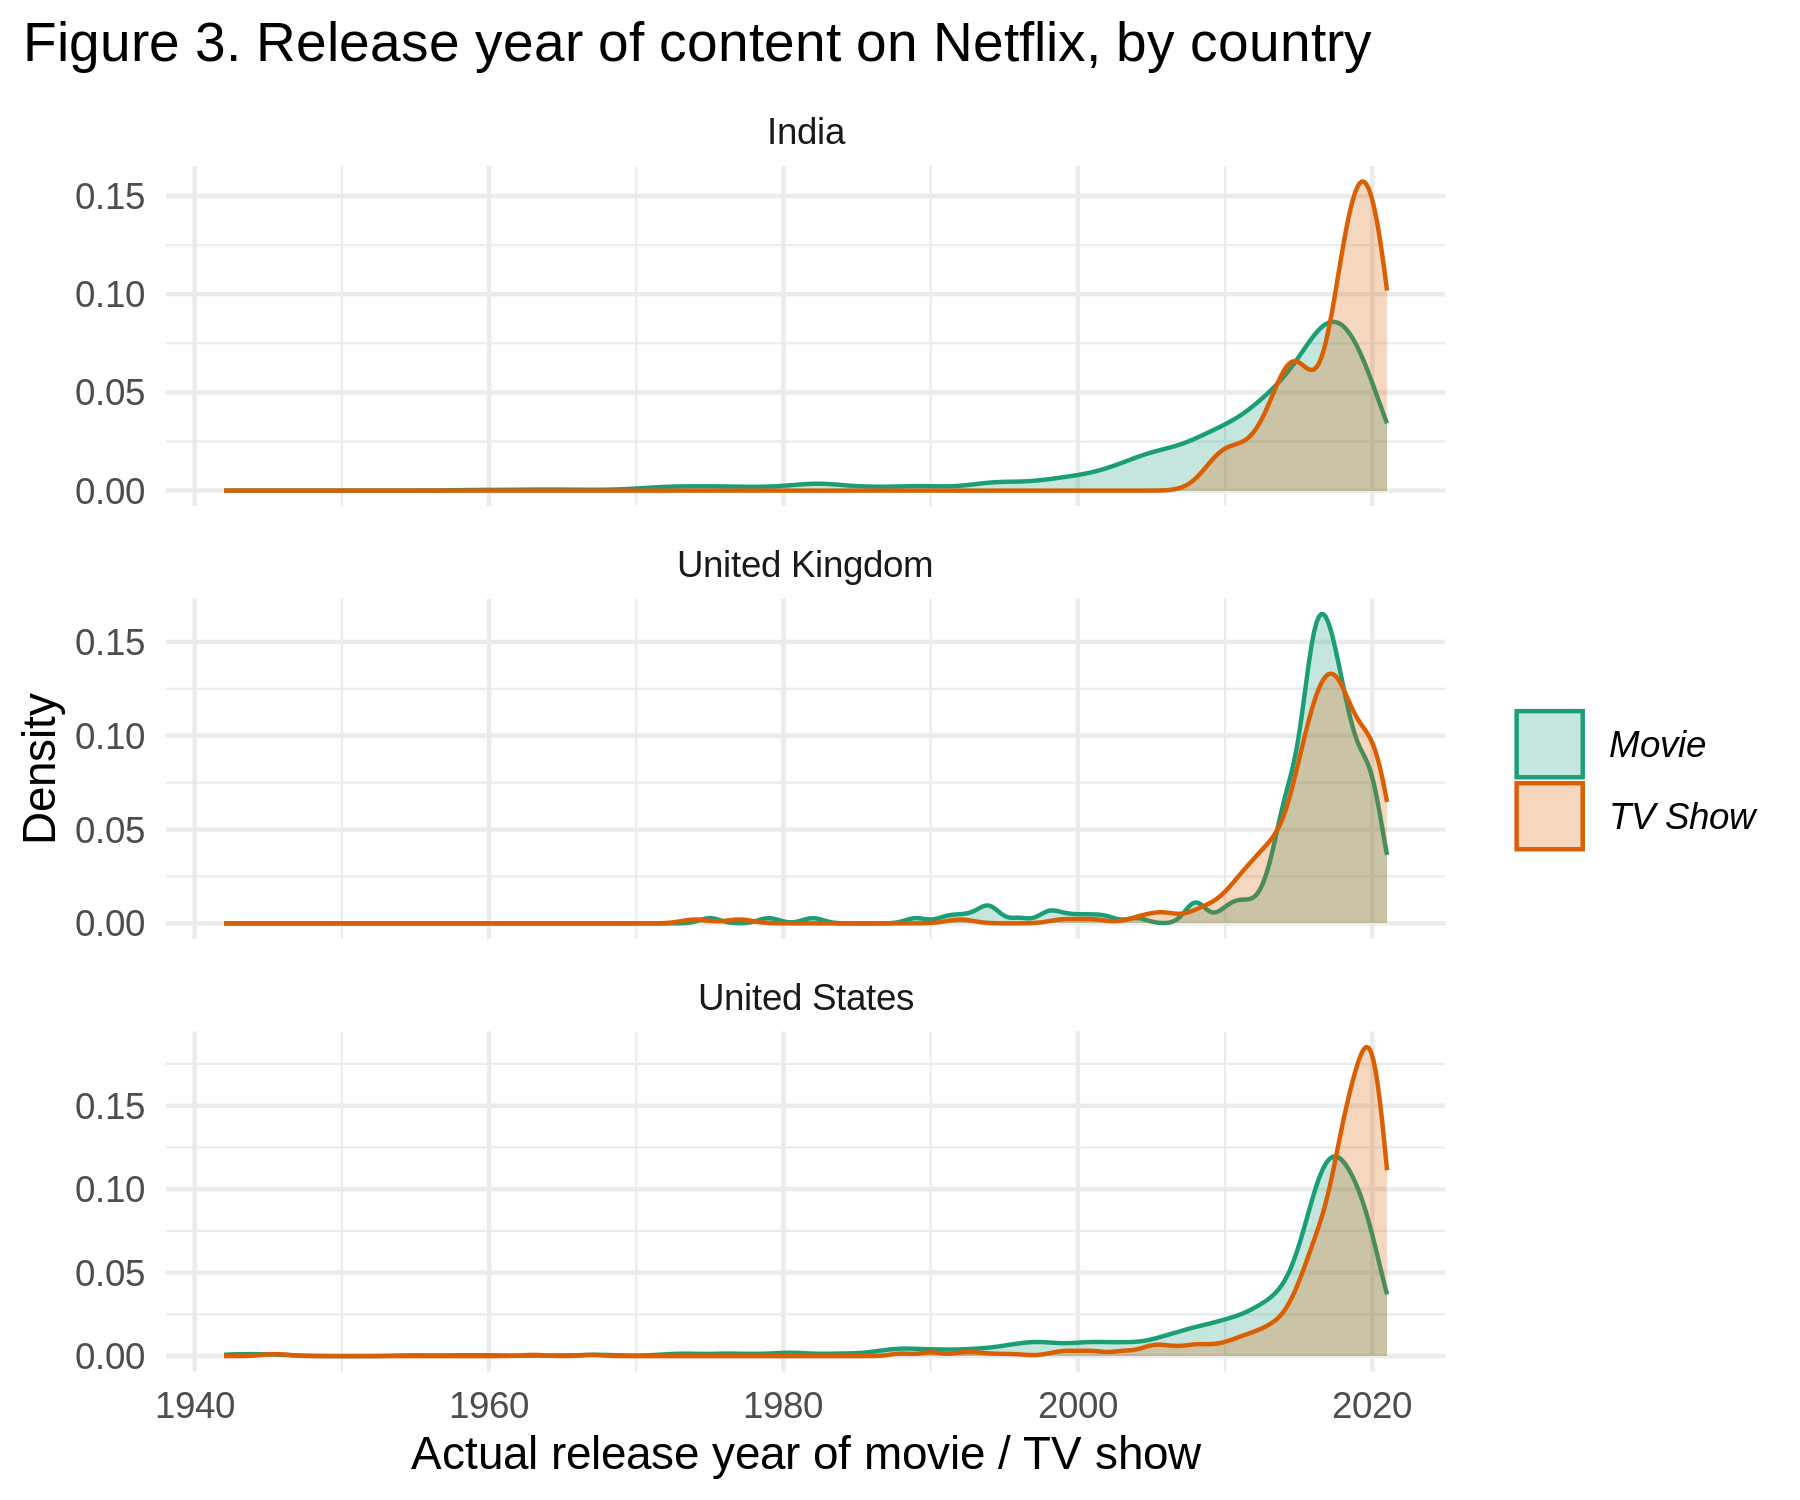

In [13]:
#Release year of content on Netflix, by type and country (density)
netflix5=netflix |> 
    filter(country %in% c('United States', 'India', 'United Kingdom'))

options(repr.plot.height = 5, repr.plot.width=6) 

p = ggplot(netflix5, aes(x=release_year, color=type, fill=type)) + 
    geom_density(alpha=0.25) + facet_wrap(~country, ncol=1, scales='free_y') + 
    labs(title='Figure 3. Release year of content on Netflix, by country', x='Actual release year of movie / TV show', y='Density') + 
    scale_color_brewer(palette='Dark2') + scale_fill_brewer(palette='Dark2') + theme_minimal() +
    theme(plot.title.position = 'plot', legend.text = element_text(face = 'italic'), legend.title=element_blank())  

p

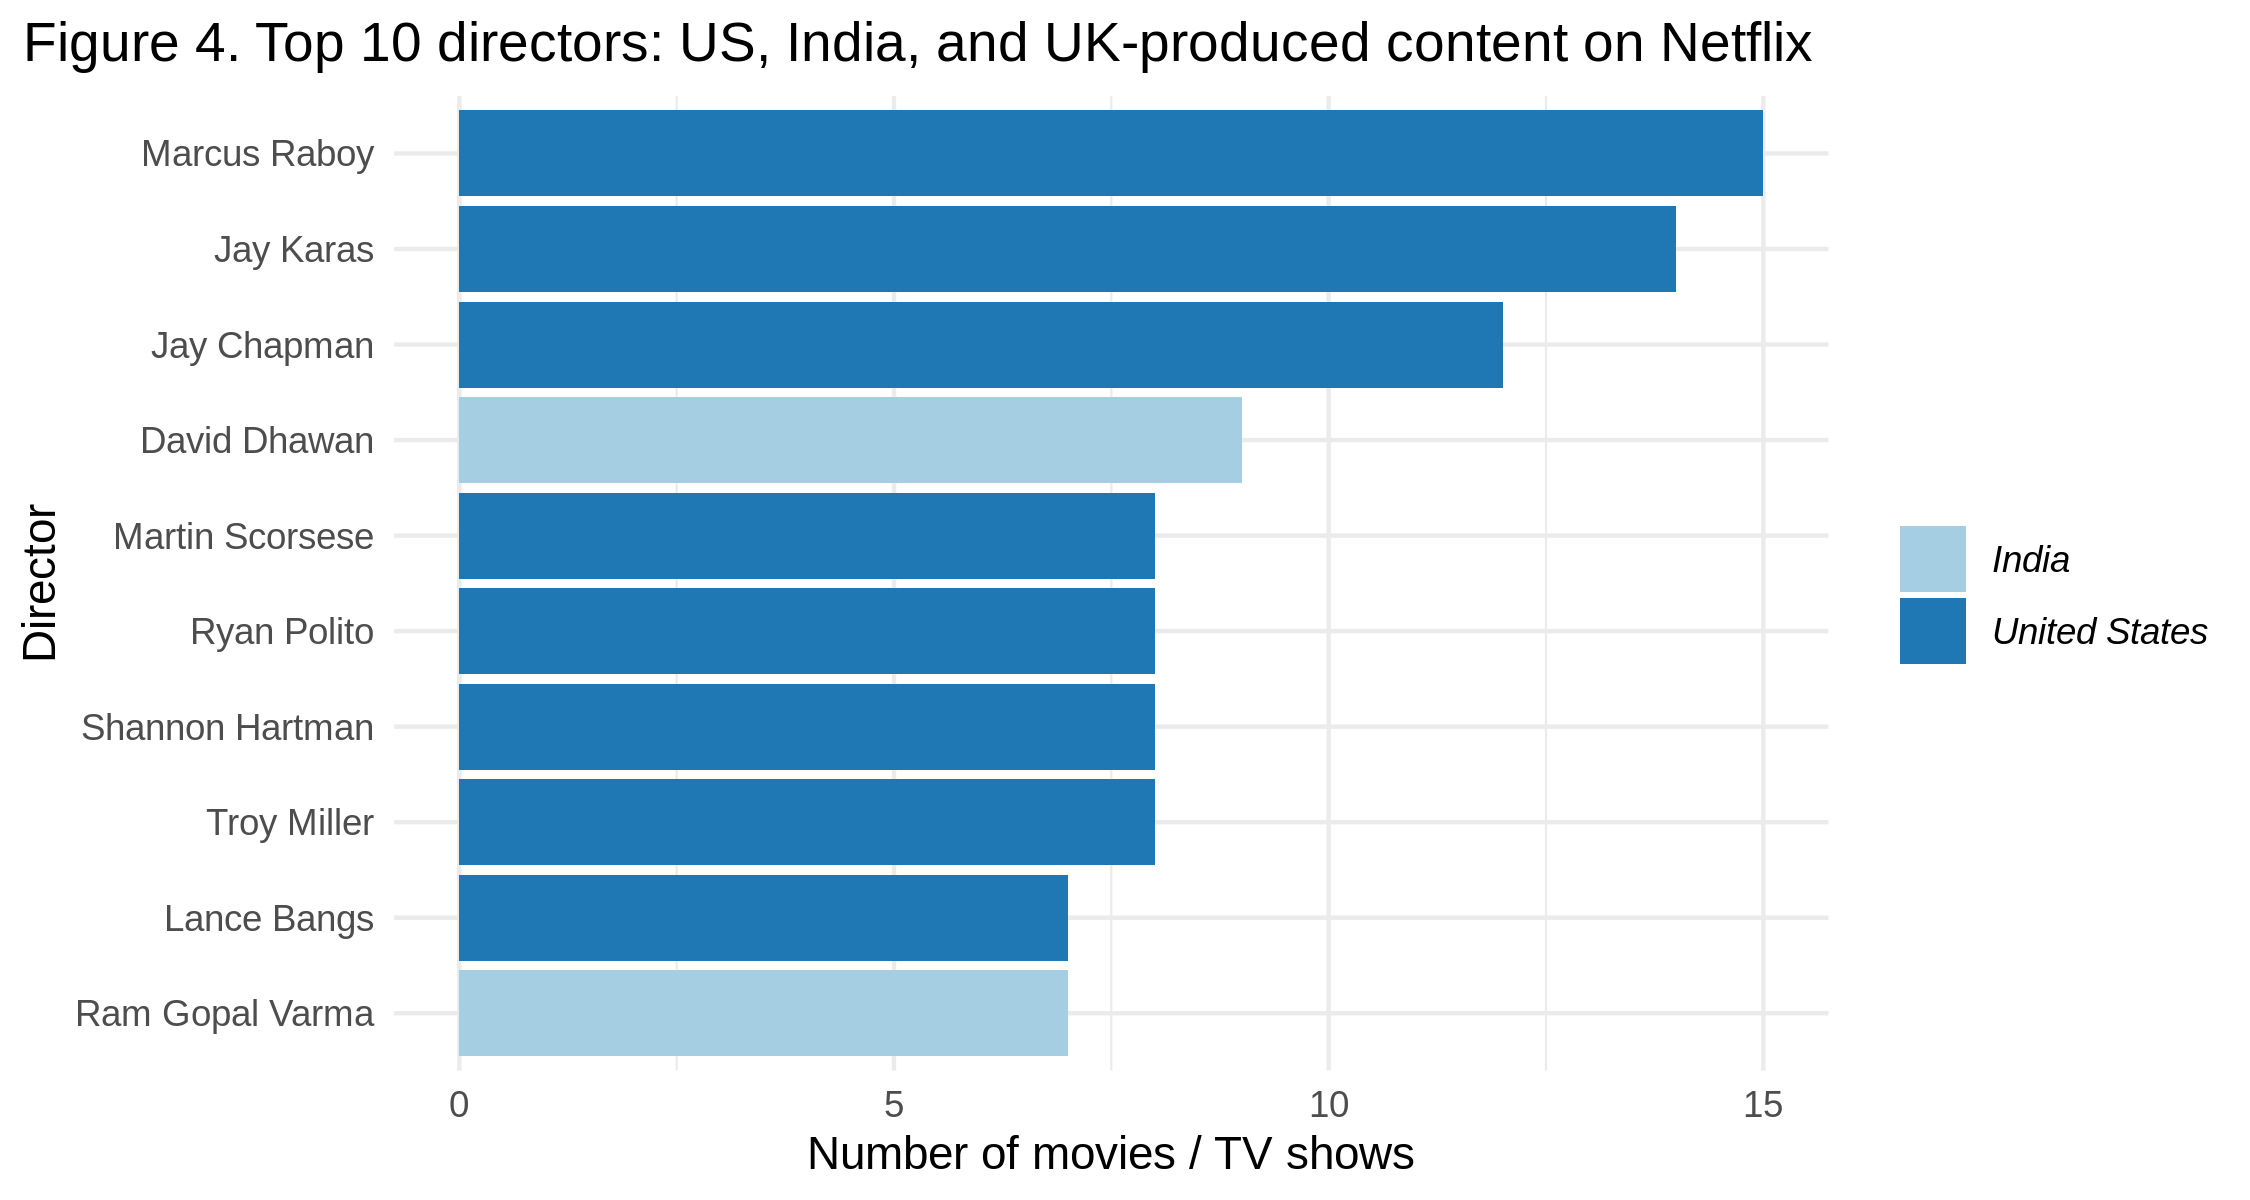

In [14]:
#Top 10 directors (US, India, UK content only) and country  
netflix6=netflix |>  
    filter(country %in% c('United States', 'India', 'United Kingdom')) |> 
    mutate(director=fct_infreq(director) |> 
        fct_rev() |> 
        fct_lump(n=10))|> 
        filter(!director %in% c('Other')) |> 
        filter(!is.na(director))

options(repr.plot.height = 4, repr.plot.width=7.5) 
 
p = ggplot(netflix6, aes(y=director, fill=country)) + geom_bar() + 
    labs(title='Figure 4. Top 10 directors: US, India, and UK-produced content on Netflix', 
         x='Number of movies / TV shows', y='Director') +
    scale_color_brewer(palette='Paired') + scale_fill_brewer(palette='Paired') + 
    theme_minimal() + 
    theme(plot.title.position = 'plot', legend.text = element_text(face = 'italic'), legend.title=element_blank())
p
